### Importing Modules

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [11]:
import pandas as pd
import statsmodels.api as sm
from pandas.tools.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [7]:
series.head() #Returns the first 5 rows of series dataframe

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [8]:
series.shape #Return dimensions

(36,)

In [9]:
series.isnull().sum()

0

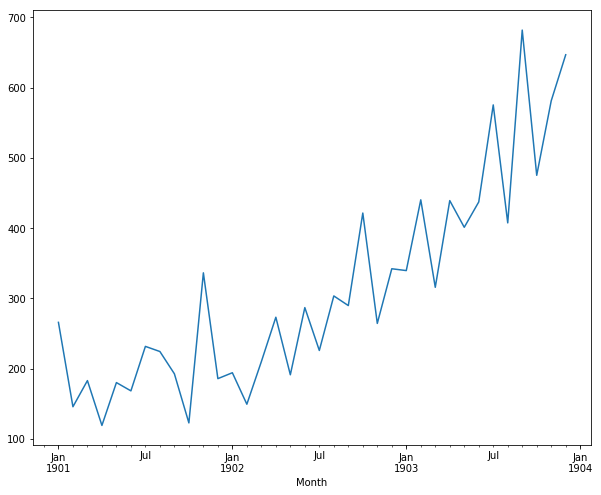

In [12]:
#Makes plot of series data
series.plot(figsize=(10,8))
plt.show()

In [14]:
model = ARIMA(series, order=(5,1,0)).fit(disp=0)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          ARIMA Model Results                                          
=======================================================================================================
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Thu, 18 Apr 2019   AIC                            406.340
Time:                                                 21:15:31   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales of shampoo over a three year period    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales of shampoo over a three year period    -0.6203      0.282     -2.203      0.036      -1.172      -0.068
ar.L3.D.Sales of shampoo over a three year period    -0.3606      0.295     -1.222      0.231      -0.939       0.218
ar.L4.D.Sales of shampoo over a three year period    -0.1252      0.280     -0.447      0.658      -0.674       0.424
ar.L5.D.Sales of shampoo over a three year period     0.1289      0.191      0.673      0.506      -0.246       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

In [24]:
data = series.values
size = int(len(data) * 0.70)
train, test = data[0:size], data[size:len(data)]
Actuals = [x for x in train]
predictions = []
for i in range(len(test)):
    model = ARIMA(Actuals, order=(5,1,0)).fit(disp=0)
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[i]
    Actuals.append(obs)
    print('Predicted=%f, Expected=%f' % (yhat, obs))

Predicted=387.376446, Expected=440.400000
Predicted=348.154141, Expected=315.900000
Predicted=386.308803, Expected=439.300000
Predicted=356.082046, Expected=401.300000
Predicted=446.379461, Expected=437.400000
Predicted=394.737311, Expected=575.500000
Predicted=434.915513, Expected=407.600000
Predicted=507.923346, Expected=682.000000
Predicted=435.482809, Expected=475.300000
Predicted=652.743808, Expected=581.300000
Predicted=546.343467, Expected=646.900000


In [25]:
mean_squared_error(test,predictions)

8119.127206477744

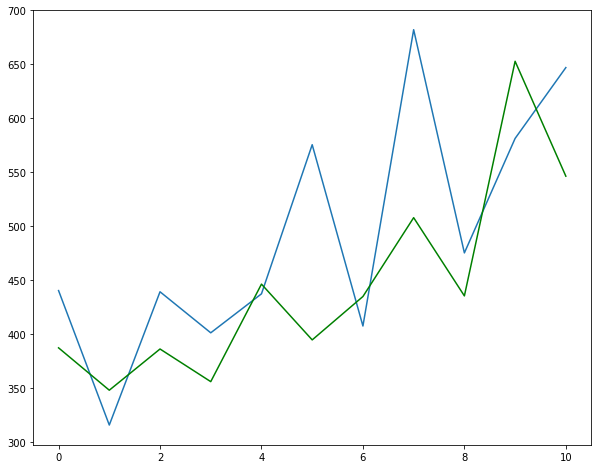

In [26]:
#Plots the test and predicted shampoo sales data
plt.figure(figsize=(10,8))
plt.plot(test)
plt.plot(predictions, color='green')
plt.show()